In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [114]:
data_train = pd.read_csv("DailyDelhiClimateTrain.csv")
data_test = pd.read_csv("DailyDelhiClimateTest.csv")

In [115]:
data_X_train = data_train[["humidity"]]
data_Y_train = data_train["meantemp"]

In [116]:
data_X_test = data_test[["humidity"]]
data_Y_test = data_test["meantemp"]

In [117]:
projected_data = pd.concat([data_X_train,data_Y_train],axis=1)

<Figure size 4000x4000 with 0 Axes>

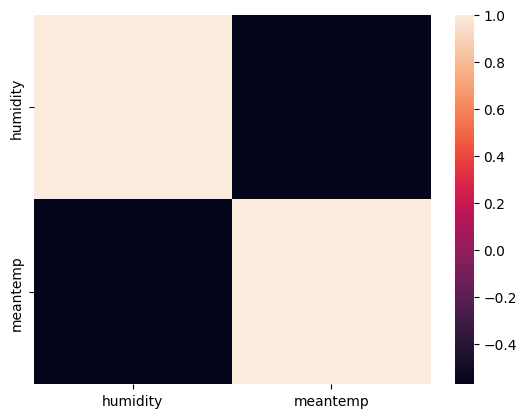

<Figure size 4000x4000 with 0 Axes>

In [118]:
sns.heatmap(projected_data.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(40,40))

In [119]:
projected_data1 = pd.concat([data_X_test,data_Y_test],axis=1)

<Figure size 4000x4000 with 0 Axes>

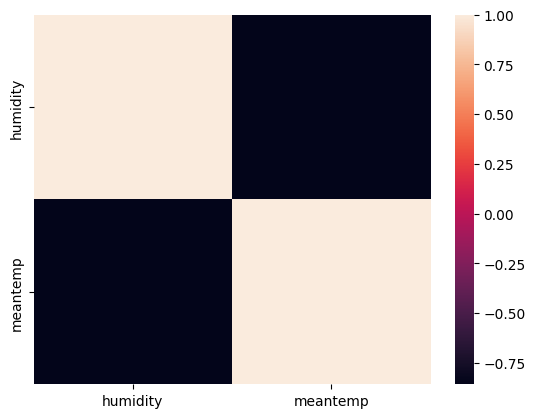

<Figure size 4000x4000 with 0 Axes>

In [120]:
sns.heatmap(projected_data1.corr(),xticklabels=True,yticklabels=True)
plt.figure(figsize=(40,40))

In [121]:
training_data = projected_data
testing_data = projected_data1

In [122]:
X_train_transpose = np.array(training_data.iloc[:,0:projected_data.shape[1]-1])
y_train = np.array(training_data["meantemp"]).reshape(-1,1)

X_test_transpose = np.array(testing_data.iloc[:,0:projected_data1.shape[1]-1])
y_test = np.array(testing_data["meantemp"]).reshape(-1,1)

In [123]:
N_train = y_train.shape[0]

In [124]:
def del_by_del_thetas(theta_0,theta):
 y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
 error_vector_transpose = np.transpose(y_pred - y_train)
 del_by_del_theta = (2/N_train)*np.transpose(np.matmul(error_vector_transpose,
 X_train_transpose))
 del_by_del_theta_0 = (2/N_train)*np.sum(error_vector_transpose)
 return [del_by_del_theta_0,del_by_del_theta]

In [125]:
def mae(theta_0,theta):
 y_pred = (theta_0 + np.matmul(X_train_transpose,theta))
 abs_error_vector = np.abs(y_pred - y_train)
 return np.mean(abs_error_vector)

In [147]:
epsilon = 10**(-7)
tol = 10**(-6)
#theta_0_initial = np.random.randn(1,)[0]
theta_0_initial = 0
theta_initial = np.zeros((X_train_transpose.shape[1],1))
iteration = 0
while True:
 initial_gradients = del_by_del_thetas(theta_0_initial,
 theta_initial)
 theta_0_final = theta_0_initial - (epsilon * initial_gradients[0])
 theta_final = theta_initial - (epsilon * initial_gradients[1])
 initial_gradient_vector = np.concatenate((np.array([[initial_gradients[0]]]),
 initial_gradients[1]))
 initial_mae = mae(theta_0_initial,theta_initial)
 final_mae = mae(theta_0_final,theta_final)
 if abs(initial_mae - final_mae) < tol:
    break
 initial_mae = mae(theta_0_initial,theta_initial)
 print("The Value of MAE at iteration # {} is {}".format(iteration,initial_mae))
 theta_0_initial = theta_0_final
 theta_initial = theta_final
 iteration += 1

The Value of MAE at iteration # 0 is 25.495520655761762
The Value of MAE at iteration # 1 is 25.4775395829227
The Value of MAE at iteration # 2 is 25.459572805572023
The Value of MAE at iteration # 3 is 25.441620312344373
The Value of MAE at iteration # 4 is 25.423682091883418
The Value of MAE at iteration # 5 is 25.405758132841857
The Value of MAE at iteration # 6 is 25.38784842388141
The Value of MAE at iteration # 7 is 25.369952953672826
The Value of MAE at iteration # 8 is 25.352071710895828
The Value of MAE at iteration # 9 is 25.334204684239175
The Value of MAE at iteration # 10 is 25.316351862400584
The Value of MAE at iteration # 11 is 25.298513234086794
The Value of MAE at iteration # 12 is 25.280688788013496
The Value of MAE at iteration # 13 is 25.26287851290536
The Value of MAE at iteration # 14 is 25.245082397496027
The Value of MAE at iteration # 15 is 25.22730043052809
The Value of MAE at iteration # 16 is 25.209532600753082
The Value of MAE at iteration # 17 is 25.19177

In [150]:
theta_initial

array([[0.37138865]])

In [149]:
theta_0_initial

np.float64(0.010327475933495539)

In [129]:
theta_initial

array([[0.30628674]])

In [156]:
y_pred_new = theta_0_initial + np.matmul(X_test_transpose, theta_initial)
predictions = pd.DataFrame({"Humidity":data_test["humidity"],"Predicted_Temperature": y_pred_new.flatten()})

print(predictions)

      Humidity  Predicted_Temperature
0    85.869565              31.901309
1    77.222222              28.689784
2    81.888889              30.422931
3    70.050000              26.026102
4    74.944444              27.843843
..         ...                    ...
109  27.500000              10.223515
110  39.375000              14.633755
111  40.900000              15.200123
112  27.500000              10.223515
113  27.142857              10.090876

[114 rows x 2 columns]
